<a href="https://colab.research.google.com/github/AtulChouhan0/-Global-Terrorism-Analysis/blob/main/Final_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

# <b> “Everyone’s worried about stopping terrorism. Well, there’s really an easy way: Stop participating in it.” </b>
This quote belongs to Noam Chomsky. is an American linguist, philosopher, cognitive scientist, historian,social critic, and political activist. Sometimes called "The Father Of Modern Linguistics",Chomsky is also a major figure in analytic philosophy and one of the founders of the field of cognitive science (source: https://en.wikipedia.org/wiki/Noam_Chomsky)

Data science is an interdisciplinary field focused on extracting knowledge from data sets, which are typically large (see big data), and applying the knowledge and actionable insights from data to solve problems in a wide range of application domains

Data analysis, is a process for obtaining raw data, and subsequently converting it into information useful for decision-making by users and here we goona see how the terrorism affect our day to day life;


1. <b>Data requirements</b>. We'll look at each variable and do a philosophical analysis about their meaning and importance for this problem.
2. <b>Data collection</b>. Data are collected from a variety of sources but here we have a GTD database.
3. <b>Data processing</b>. We'll try to understand how the dependent variable and independent variables relate.
4. <b>Data cleaning</b>. We'll clean the dataset and handle the missing data, outliers and categorical variables.

Then lets start our journey to Global Terrorism Database


**Import libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time
from IPython.display import clear_output
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


**Read Data from Google colab**

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


Read CSV File

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Almabetter/capstone/EDA/global_terrorism/Global Terrorism Data.csv', encoding='ISO-8859-1', low_memory=False)
dm = pd.read_csv('/content/drive/MyDrive/Almabetter/capstone/EDA/global_terrorism/Global Terrorism Data.csv', encoding='ISO-8859-1', low_memory=False)
dm.rename(columns= {'iyear':'YEAR','imonth':'MONTH','iday':'DAY','country_txt':'COUNTRY','region_txt':'REGION NAME','attacktype1_txt':'ATTACK TYPE','targtype1_txt':'TARGET TYPE','weaptype1_txt':'WEAPON USED','nkill':'KILL','success':'SUCCESS RATE','gname':'RESPONSIBLE GROUP','property':'PROPERTY'}, inplace=True)

data_relevant=dm[['YEAR','MONTH','DAY','COUNTRY','REGION NAME','ATTACK TYPE','TARGET TYPE','WEAPON USED','KILL','SUCCESS RATE','RESPONSIBLE GROUP','PROPERTY']]

Display Head of the Data

In [ ]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
df.count

<bound method DataFrame.count of              eventid  iyear  imonth  iday  ... INT_IDEO  INT_MISC INT_ANY  related
0       197000000001   1970       7     2  ...        0         0       0      NaN
1       197000000002   1970       0     0  ...        1         1       1      NaN
2       197001000001   1970       1     0  ...       -9         1       1      NaN
3       197001000002   1970       1     0  ...       -9         1       1      NaN
4       197001000003   1970       1     0  ...       -9         1       1      NaN
...              ...    ...     ...   ...  ...      ...       ...     ...      ...
181686  201712310022   2017      12    31  ...        0         0       0      NaN
181687  201712310029   2017      12    31  ...       -9         1       1      NaN
181688  201712310030   2017      12    31  ...        0         0       0      NaN
181689  201712310031   2017      12    31  ...       -9         0      -9      NaN
181690  201712310032   2017      12    31  ...       -

In [ ]:
# df.columns

In [ ]:
# To check the unique values of the column 
# to see what does the column contain


# list(df['propvalue'].unique())

In [ ]:
df.loc[~df['approxdate'].isna(), 'approxdate']

24                      January 19-20, 1970
53                       February 6-9, 1970
60                     February 11-14, 1970
73                     February 16-17, 1970
138                       March 16-17, 1970
                        ...                
181640                  2017-12-29 00:00:00
181643    December 25, 2017-January 5, 2018
181644    December 25, 2017-January 5, 2018
181668                  2017-12-31 00:00:00
181670                  2017-12-31 00:00:00
Name: approxdate, Length: 9239, dtype: object

In [ ]:
dfyear = df.groupby('iyear')['iyear'].count()

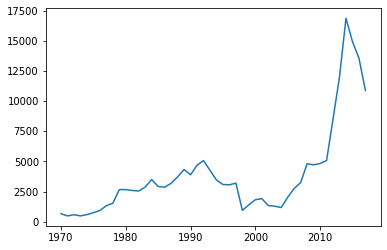

In [ ]:
plt.plot(dfyear)

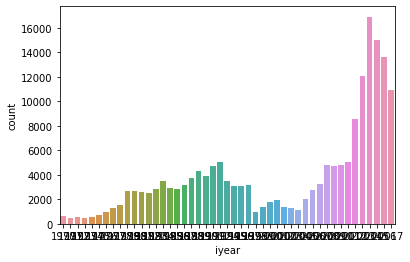

In [ ]:
sns.countplot('iyear',data = df)

In [ ]:
mean_kill=df['nkill'].mean()

In [ ]:
 df['nkill'].fillna(value=mean_kill)

0         1.000000
1         0.000000
2         1.000000
3         2.403272
4         2.403272
            ...   
181686    1.000000
181687    2.000000
181688    0.000000
181689    0.000000
181690    0.000000
Name: nkill, Length: 181691, dtype: float64

As we can see the Null value in the kill was replaced with mean value of 'KILL' variable.

## Now we wiil find the numbers of unique value in the data_relevant data frame

In [ ]:
# Count of Values in each column of DataFrame
df.nunique()

eventid       181691
iyear             47
imonth            13
iday              32
approxdate      2244
               ...  
INT_LOG            3
INT_IDEO           3
INT_MISC           3
INT_ANY            3
related        14306
Length: 135, dtype: int64

In [ ]:
df.isna().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [ ]:
# Years in the DataFrame
df["iyear"].unique()

array([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1986, 1982, 1983, 1984, 1985, 1987, 1988, 1989, 1990, 1991,
       1992, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017])

In [ ]:
# Count of each year in the Data Frame
df["iyear"].value_counts()

2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
2012     8522
2011     5076
1992     5071
2010     4826
2008     4805
2009     4721
1991     4683
1989     4324
1990     3887
1988     3721
1984     3495
1994     3456
2007     3242
1997     3197
1987     3183
1995     3081
1996     3058
1985     2915
1983     2870
1986     2860
2006     2758
1979     2662
1980     2662
1981     2586
1982     2544
2005     2017
2001     1906
2000     1814
1978     1526
1999     1395
2002     1333
1977     1319
2003     1278
2004     1166
1998      934
1976      923
1975      740
1970      651
1974      581
1972      568
1973      473
1971      471
Name: iyear, dtype: int64

In [ ]:
# Total count of Target type in the DataFrame
df['targtype1_txt'].value_counts()

Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Terrorists/Non-State Militia       3039
Journalists & Media                2948
Violent Political Party            1866
Airports & Aircraft                1343
Telecommunication                  1009
NGO                                 970
Tourists                            440
Maritime                            351
Food or Water Supply                317
Abortion Related                    263
Other                               137
Name: targtype1_txt, dtype: int64

#It's known to the everyone that Private Citizens & Property's are the main target for the terrorist groups do not know what they get by doing this as we all are lost  our beloved ones

In [ ]:
# Correlation among the columns

data_relevant.corr()

,YEAR,MONTH,DAY,KILL,SUCCESS RATE,PROPERTY
YEAR,1.000000,0.000139,0.018254,0.015341,-0.082963,-0.278916
MONTH,0.000139,1.000000,0.005497,0.003463,-0.002845,-0.005816
DAY,0.018254,0.005497,1.000000,-0.003693,-0.011802,-0.003903
KILL,0.015341,0.003463,-0.003693,1.000000,0.053115,-0.016212
SUCCESS RATE,-0.082963,-0.002845,-0.011802,0.053115,1.000000,-0.036876
PROPERTY,-0.278916,-0.005816,-0.003903,-0.016212,-0.036876,1.000000


In [ ]:
#most and least attacked countries
Most_attacked_countries = data_relevant['COUNTRY'].value_counts().head(1)
least_attacked_countries = data_relevant['COUNTRY'].value_counts().tail(1)
print(f'The most attacked country is {Most_attacked_countries}')
print(f'The most attacked country is {least_attacked_countries}')

The most attacked country is Iraq    24636
Name: COUNTRY, dtype: int64
The most attacked country is Antigua and Barbuda    1
Name: COUNTRY, dtype: int64


## Till now we did our Data Mining part and from these we can able to get some idea about the database and some info like 

i. Most affected Region
ii.Terrorist Group
iii. Most used weapon
iv. Target Type

##Now start some Visualisation part

In Which Year Does the highest number of attacks occured ? We can plot bar plot using seaborn.

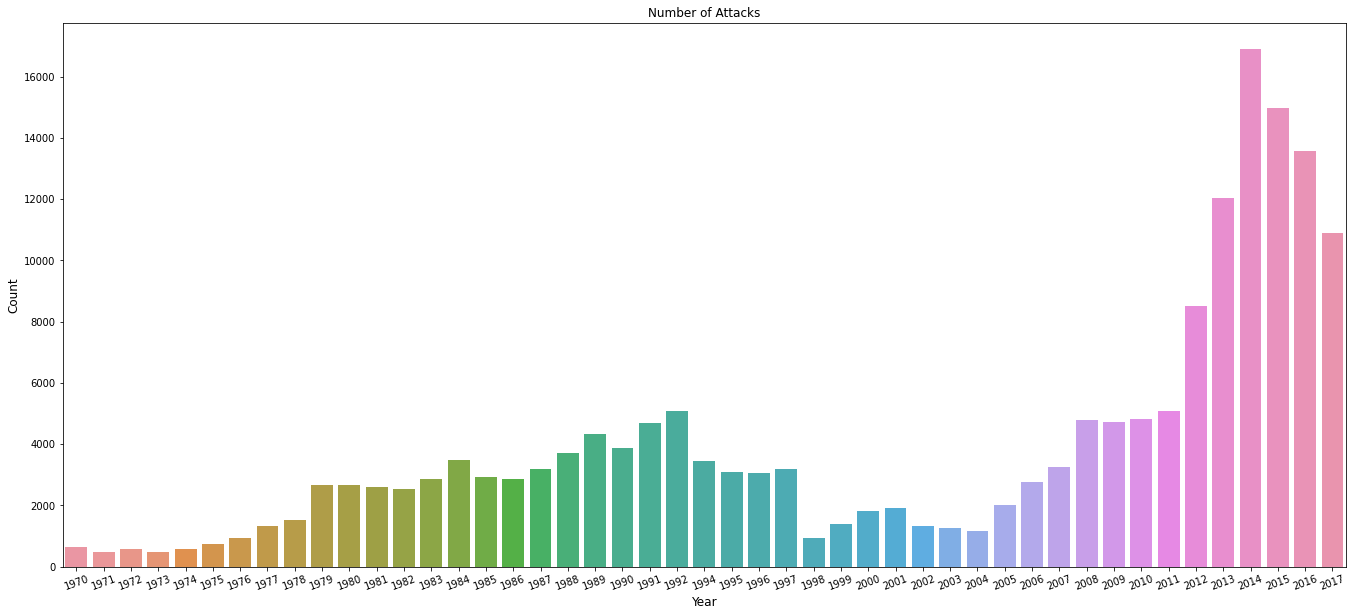

In [ ]:
f = plt.figure(figsize=(23,10))
year_count = sns.countplot(x='iyear', data  = df)
year_count.set_xticklabels(year_count.get_xticklabels(),rotation=20)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Count', fontsize=12)
plt.title('Number of Attacks',fontsize =12)
plt.show()

##<b> OUTCOME OF THE ABOVE BAR PLOT (If We Consider Decade wise)

i.1970-1979: From 1974 terrorist activity gradually increased every year and reached its peak on 1979 for the decade 1970-1979.

ii. 1980-1989: In 1980 terrorist attack increased comparatively from 1979.In 1989 the attack tops for this decade.

iii. 1990-1999: In 1992 the attack tops for this decade.

iv. 2000-2009: Least for the year 2004 and gradually increased from 2005 upto 2008 and tops in the year 2008.

v. From 2010 to 2017 :  Gradually increased from 2010 and it reached its top in the year 2014 and after that it gradually decreased.

Which region suffered the highest number of attacks ? We can plot similar bar plot using seaborn. 

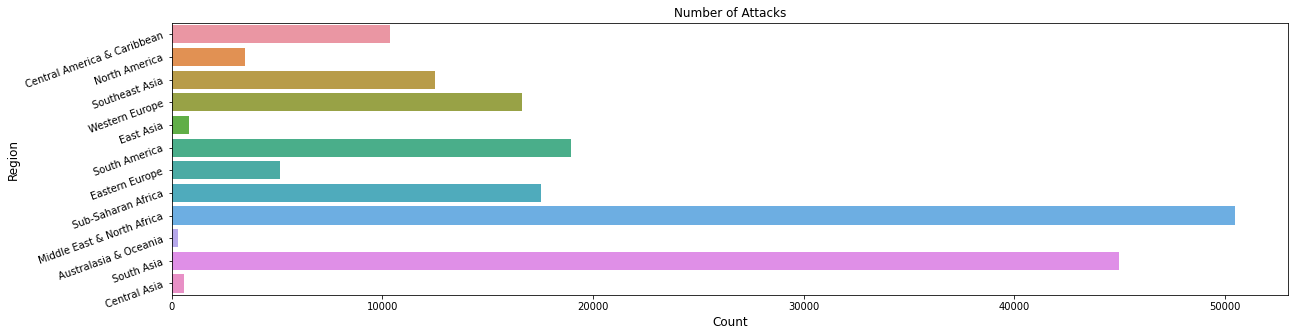

In [ ]:
f = plt.figure(figsize=(20,5))
#sns.set(font_scale=0.9)
year_count = sns.countplot(y='region_txt', data  = df)
year_count.set_yticklabels(year_count.get_yticklabels(),rotation=20)
plt.ylabel('Region', fontsize = 12)
plt.xlabel('Count', fontsize=12)
plt.title('Number of Attacks',fontsize =12)
plt.show()

Often In news of social media we have read — Middle-East & North Africa and South Asia are the two top regions in terms of number of terrorist attacks. We can also check what type of attacking method was most used by terrorists. Here we have used Pie plot to display the Various attack types which are mostly used by the terrorists.

Bombing/Explosion                 88255
Armed Assault                     42669
Assassination                     19312
Hostage Taking (Kidnapping)       11158
Facility/Infrastructure Attack    10356
Others                             9941
Name: attacktype1_txt, dtype: int64

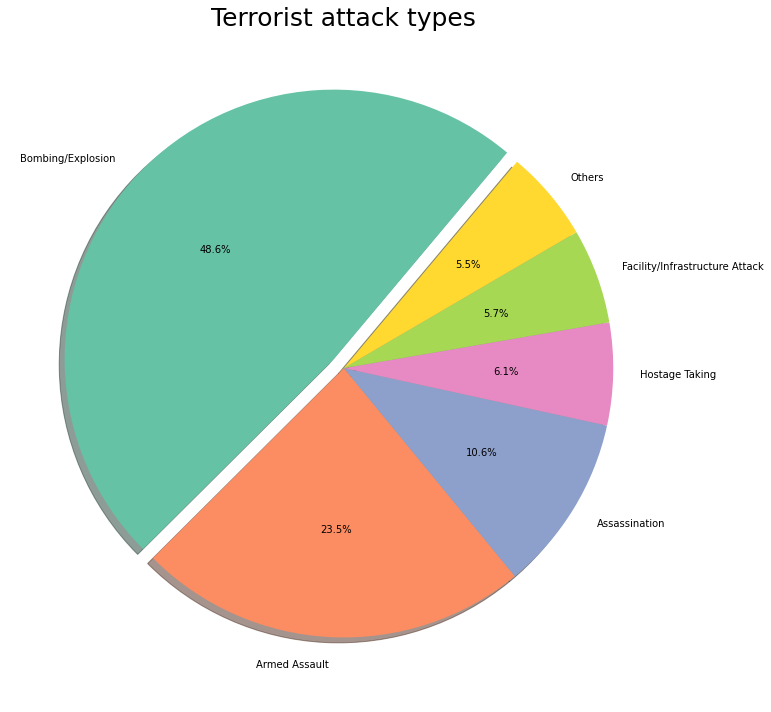

In [ ]:
filtered =df['attacktype1_txt'].apply(lambda x: x if x in ['Bombing/Explosion','Armed Assault','Assassination',
                                                            'Hostage Taking (Kidnapping)','Facility/Infrastructure Attack'] else 'Others')

attack_type = filtered.value_counts()
labels = ['Bombing/Explosion','Armed Assault','Assassination',
          'Hostage Taking','Facility/Infrastructure Attack','Others']
plt.figure(figsize=(20,10))
sizes = [attack_type]
colors = sns.color_palette("Set2")
explode = (0.05,0, 0, 0, 0, 0)  
plt.pie(sizes, labels=labels, explode=explode, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=50)
plt.title('Terrorist attack types', fontsize= 25)
plt.tight_layout()

attack_type

##From the above data we can see Bombing/Explosion is the main weapon used for any attack by the terrorist as it can do a large impact.

##As per US federal Bureau Of Investigation , bombing accounts for nearly 70% of all terrorist attacks in the USA.

##Hijacking is the least attack type as all the government tightened the securitities at the Airport.

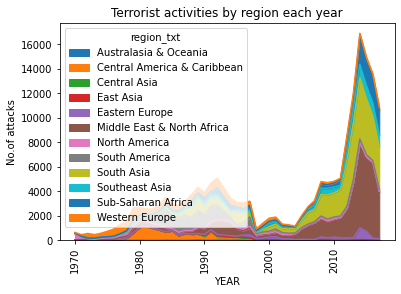

In [ ]:
# Terrorist activities by region each year

regional_terrorists_activities = df.groupby(['iyear','region_txt'])['region_txt'].count().unstack()
regional_terrorists_activities.plot(kind = 'area')
plt.title('Terrorist activities by region each year')
plt.ylabel('No.of attacks')
plt.xlabel('YEAR')
plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = (20,5)

Conclusion: Middle East & North Africa and south asia are most hot zone of terrorist attacks and so they are most affected region. Also,South Asia region has more attacks during and after year 2010.

In [ ]:
df['country_txt'].value_counts()
df['region_txt'].value_counts()
df['gname'].value_counts()
df['attacktype1_txt'].value_counts()
df['targtype1_txt'].value_counts()
df['iyear'].value_counts()
df['nkill'].value_counts()
print('Country with Highest Terrorist Attacks:',data_relevant['COUNTRY'].value_counts().index[0])
print('Regions with Highest Terrorist Attacks:',data_relevant['REGION NAME'].value_counts().index[0])
print('Maximum people killed in an attack are:',data_relevant['KILL'].max(),'that took place in',data_relevant.loc[data_relevant['KILL'].idxmax()].COUNTRY)

Country with Highest Terrorist Attacks: Iraq
Regions with Highest Terrorist Attacks: Middle East & North Africa
Maximum people killed in an attack are: 1570.0 that took place in Iraq


Iraq is one of the most suffered country due to terrorist activities in the world followed by Pakistan and Afghanistan.

In [ ]:
# Top 10 affected countries
top_10_affected_countries = df['country_txt'].value_counts().head(10)
top_10_affected_countries

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: country_txt, dtype: int64

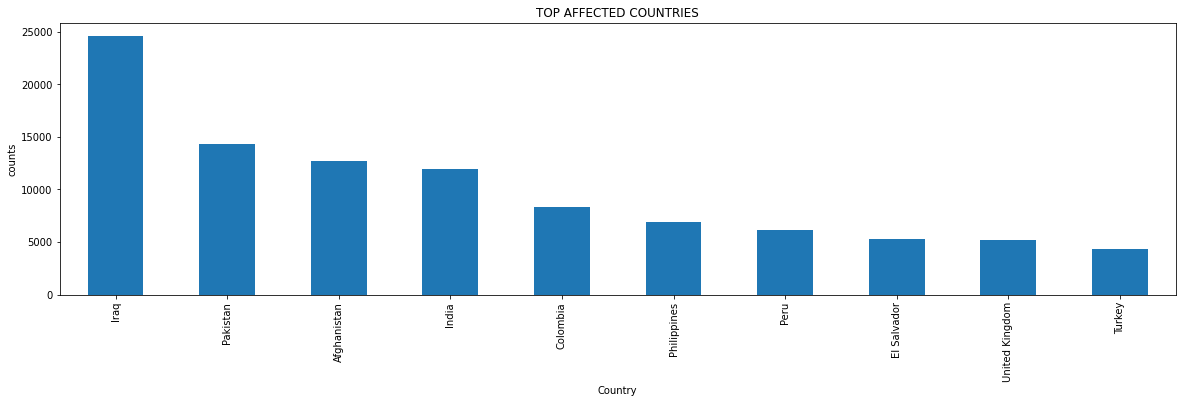

In [ ]:
top_10_affected_countries.plot(kind='bar')

plt.title('TOP AFFECTED COUNTRIES')
plt.ylabel('counts')
plt.xlabel('Country')
plt.rcParams['figure.figsize'] = (20, 5)

Conclusion: Iraq is the most attacked country in world as so it is the most affected country by terrorist attacks. We can also see in the plot that there are five countries from Asia which are mostly attacked by terrorist.

In [ ]:
# Least attacked countries
least_attacked_countries = df['country_txt'].value_counts().tail(10)
least_attacked_countries

Vatican City           1
New Hebrides           1
Falkland Islands       1
International          1
St. Lucia              1
Andorra                1
South Vietnam          1
Wallis and Futuna      1
North Korea            1
Antigua and Barbuda    1
Name: country_txt, dtype: int64

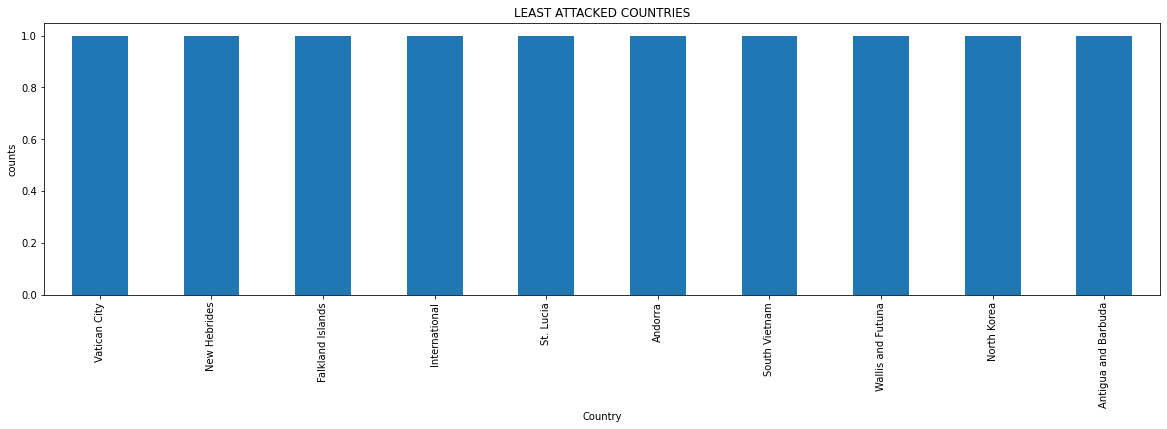

In [ ]:
least_attacked_countries.plot(kind='bar')

plt.title('LEAST ATTACKED COUNTRIES')
plt.ylabel('counts')
plt.xlabel('Country')
plt.rcParams['figure.figsize'] = (10, 5)

In [ ]:
# Top 10 state with most terrorist attacks in world
top_10_attacked_state = df['provstate'].value_counts().head(10)
top_10_attacked_state

Baghdad               7645
Northern Ireland      4498
Unknown               4290
Balochistan           3710
Saladin               3411
Al Anbar              3299
Nineveh               3241
Sindh                 3206
Khyber Pakhtunkhwa    3084
Diyala                3041
Name: provstate, dtype: int64

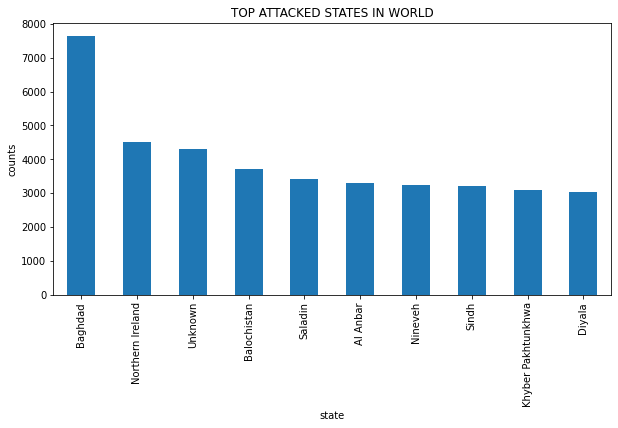

In [ ]:
# Plot top affected states in world
top_10_attacked_state.plot(kind='bar')
plt.title('TOP ATTACKED STATES IN WORLD')
plt.ylabel('counts')
plt.xlabel('state')
plt.rcParams['figure.figsize'] = (10, 5)

**Conclusion:** Baghdad (capital of Iraq) is the most attacked and affected state in the world.

In [ ]:
# States of India attacked

attack_on_India = df[df['country_txt'] == 'India']['provstate'].value_counts()
attack_on_India

Jammu and Kashmir    2454
Assam                1151
Manipur              1100
Chhattisgarh          979
Punjab                949
Jharkhand             887
Bihar                 688
West Bengal           650
Odisha                428
Maharashtra           302
Meghalaya             294
Andhra Pradesh        251
Orissa                221
Delhi                 208
Uttar Pradesh         201
Tamil Nadu            164
Unknown               157
Tripura               117
Nagaland              115
Kerala                 98
Gujarat                85
Madhya Pradesh         75
Karnataka              71
Haryana                50
Chandigarh             47
Rajasthan              43
Andhra pradesh         41
Mizoram                27
Uttaranchal            24
Arunachal Pradesh      24
Telangana              24
Himachal Pradesh       24
Goa                     5
Sikkim                  4
Puducherry              2
Name: provstate, dtype: int64

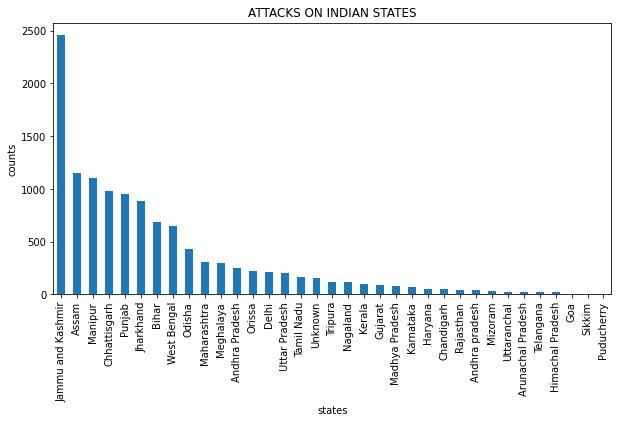

In [ ]:
# Plot most attacked Indian state.
attack_on_India.plot(kind='bar')

plt.title('ATTACKS ON INDIAN STATES')
plt.ylabel('counts')
plt.xlabel('states')
plt.rcParams['figure.figsize'] = (20, 5)

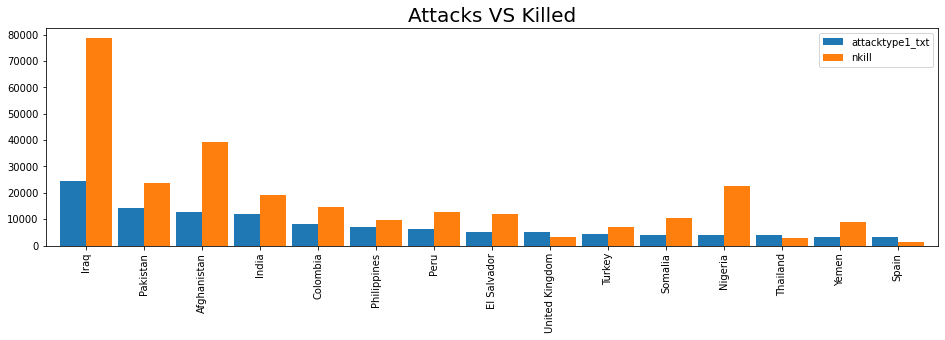

In [ ]:
# Attacks VS Killed
att_kill = df['country_txt'].value_counts()[:15].to_frame()
att_kill.columns=['attacktype1_txt']
kill_1=df.groupby ('country_txt')['nkill'].sum().to_frame()
att_kill.merge(kill_1,left_index = True,right_index =True,how='left').plot.bar(width=0.9)
fig=plt.gcf()
plt.title("Attacks VS Killed", fontsize=20)
fig.set_size_inches(16,4)
plt.show()

The Attack vs Killed ratio is top in Iraq followed by Afghanistan and Pakistan.

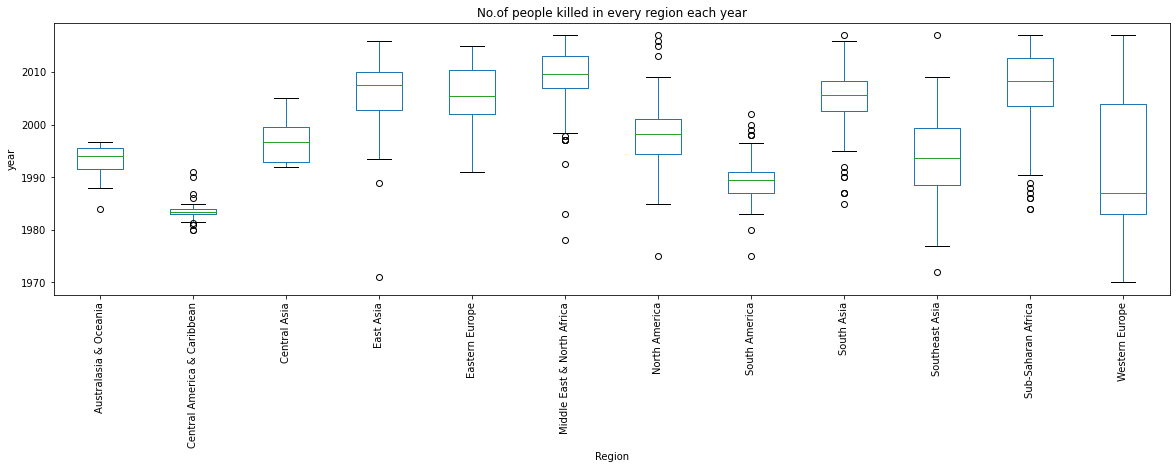

In [ ]:
# Total number of people killed in every region each year.

df.groupby(['nkill','region_txt'])['iyear'].mean().unstack().plot(kind = 'box')
plt.title('No.of people killed in every region each year')
plt.xlabel('Region')
plt.ylabel('year')
plt.xticks(rotation = 90)
plt.rcParams['figure.figsize'] = (15, 5)

# **Top 15 Country in the world which are most effected by the Terrorist**

In [ ]:
f = plt.figure(figsize=(15,20))
# sns.countplot(y=df['country_txt'], data = df)


<Figure size 1080x1440 with 0 Axes>

In [ ]:
df.groupby('country_txt')['country_txt'].count().nlargest(15)

country_txt
Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Somalia            4142
Nigeria            3907
Thailand           3849
Yemen              3347
Spain              3249
Name: country_txt, dtype: int64

In [ ]:
g = pd.DataFrame({'count':df.groupby('country_txt').size().nlargest(15)}).reset_index()

Text(0.5, 1.0, 'most terrorist attack in country')

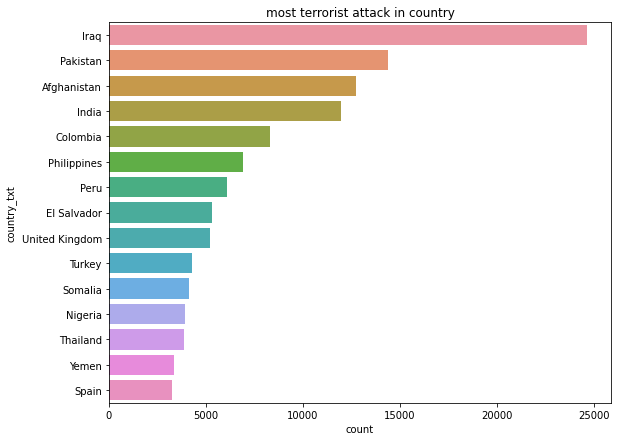

In [ ]:
plt.figure(figsize=(9,7))
sns.barplot(x=g['count'], y=g['country_txt'], data=g)
plt.title('most terrorist attack in country')

# **Most active group around the world**

In [ ]:
print('most active groups in the world')
df.groupby('gname')['gname'].count().nlargest(10)

most active groups in the world


gname
Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
Al-Shabaab                                           3288
New People's Army (NPA)                              2772
Irish Republican Army (IRA)                          2671
Revolutionary Armed Forces of Colombia (FARC)        2487
Boko Haram                                           2418
Name: gname, dtype: int64

In [ ]:
groupdf = pd.DataFrame({'count':df.groupby('gname').size().nlargest(10)}).reset_index()

In [ ]:
# groups and number of attack
groupdf

,gname,count
0,Unknown,82782
1,Taliban,7478
2,Islamic State of Iraq and the Levant (ISIL),5613
3,Shining Path (SL),4555
4,Farabundo Marti National Liberation Front (FMLN),3351
5,Al-Shabaab,3288
6,New People's Army (NPA),2772
7,Irish Republican Army (IRA),2671
8,Revolutionary Armed Forces of Colombia (FARC),2487
9,Boko Haram,2418


Text(0.5, 1.0, 'groups responsible for attack in world')

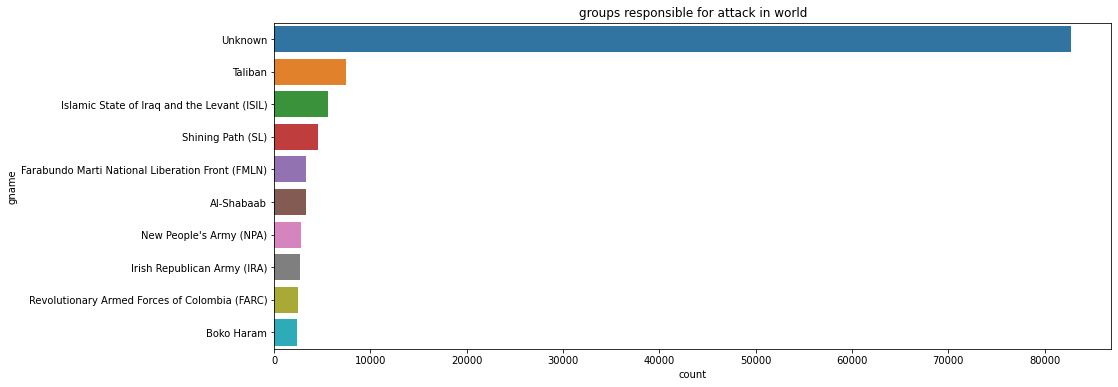

In [ ]:
plt.figure(figsize=(15, 6))
sns.barplot(y=groupdf['gname'], x=groupdf['count'], data=groupdf)
plt.title('groups responsible for attack in world')

After the above plotting we can say that, Bombing/Explosions are mostly favored by terrorists for destructive activities. 

In the below we are showing were targeted most of the times by terrorists using the Pie Plot

Others                         103675
Private Citizens & Property     43511
Military                        27984
Government (Diplomatic)          3573
Journalists & Media              2948
Name: targtype1_txt, dtype: int64

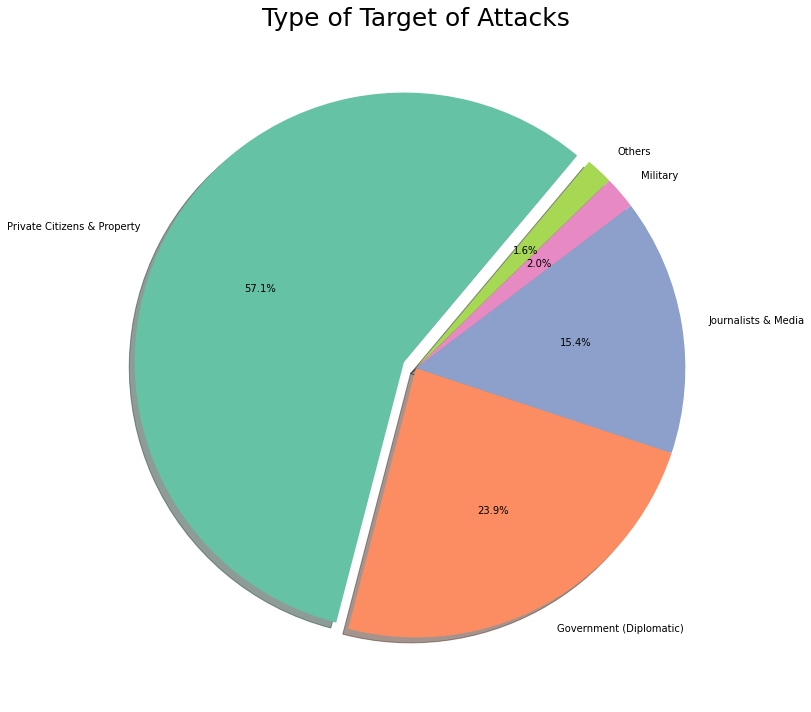

In [ ]:
filtered =df['targtype1_txt'].apply(lambda x: x if x in ['Private Citizens & Property','Government (Diplomatic)','Journalists & Media',
                                                            'Military'] else 'Others')

target = filtered.value_counts()

labels = ['Private Citizens & Property','Government (Diplomatic)','Journalists & Media','Military','Others']
weap_sizes = []
plt.figure(figsize=(20,10))
for j in target:
    percent = j*100/len(df['targtype1_txt'])
    weap_sizes.append(percent)
colors = sns.color_palette("Set2")
explode = (0.05,0, 0, 0, 0)  
plt.pie(weap_sizes, labels=labels, explode=explode, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=50)
plt.title('Type of Target of Attacks', fontsize= 25)
plt.tight_layout()

target

We can also see above that Private citizens and property were targeted most of the times by terrorists

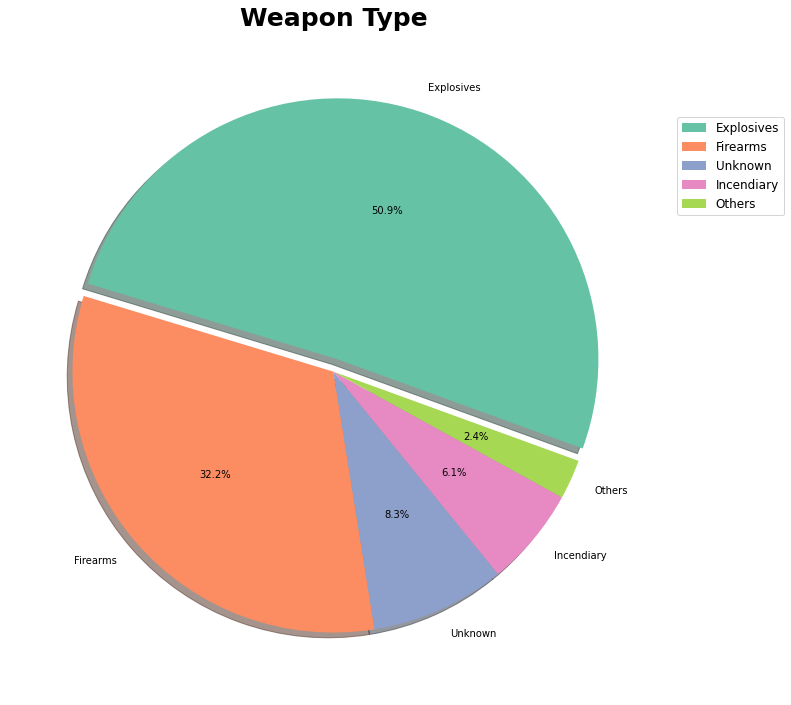

In [ ]:
weaptype_filtered =df['weaptype1_txt'].apply(lambda x: x if x in ['Explosives','Firearms','Unknown',
                                                               'Incendiary'] else 'Others')
values = weaptype_filtered.value_counts().tolist()

# Pie chart of weapons types
weap_labels = ['Explosives','Firearms','Unknown','Incendiary','Others']

weap_sizes = []

for j in values:
    percent = j*100/len(df['weaptype1_txt'])
    weap_sizes.append(percent)

fig, ax = plt.subplots(figsize=(12,12))



plt.pie(values, startangle= -20, labels = weap_labels, autopct='%1.1f%%',  shadow = True,explode = (0.05, 0, 0, 0, 0),
        colors = sns.color_palette("Set2", 8))
plt.title('Weapon Type',fontsize= 25, pad= 20, weight ='bold')
plt.legend(labels = weap_labels, loc='upper right', bbox_to_anchor = (1.2, 0.9), fontsize=12 ) # location legend
plt.show()


We have discussed above and plotted in pie chart that which type of weapons are used by terrorist. Now we are plotting number of attacks in a year with region wise 

<Figure size 792x720 with 0 Axes>

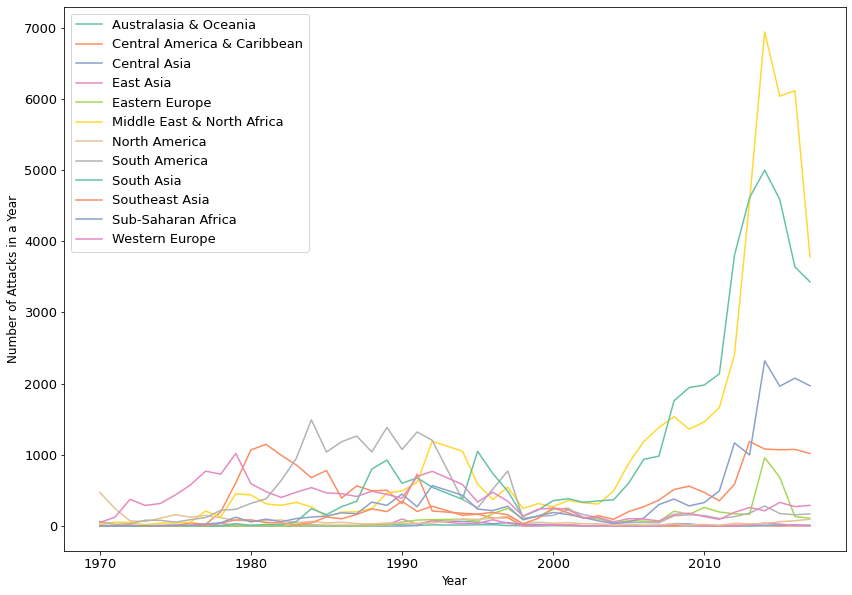

In [ ]:

df['weaptype1_txt'].value_counts()
region_year = pd.crosstab(df.iyear, df.region_txt)
fig = plt.figure(figsize=(11, 10))

colors = sns.color_palette("Set2")
region_year.plot(figsize=(14, 10), fontsize=13, color=colors)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Attacks in a Year', fontsize=12)
plt.legend(fontsize=13)

In [ ]:
df['Damage']=df['nkill']+df['nwound']

In [ ]:
table_1 = df[['attacktype1_txt','Damage']].groupby('attacktype1_txt',as_index = False).sum().sort_values(by='Damage', ascending=False)
table_1 = table_1.reset_index()
table_1

,index,attacktype1_txt,Damage
0,2,Bombing/Explosion,514233.0
1,0,Armed Assault,212386.0
2,8,Unknown,39606.0
3,1,Assassination,37209.0
4,4,Hijacking,20642.0
5,6,Hostage Taking (Kidnapping),20267.0
6,7,Unarmed Assault,14791.0
7,5,Hostage Taking (Barricade Incident),7465.0
8,3,Facility/Infrastructure Attack,6293.0


now we are plotting number of deaths and injured peoples by different type of attacks

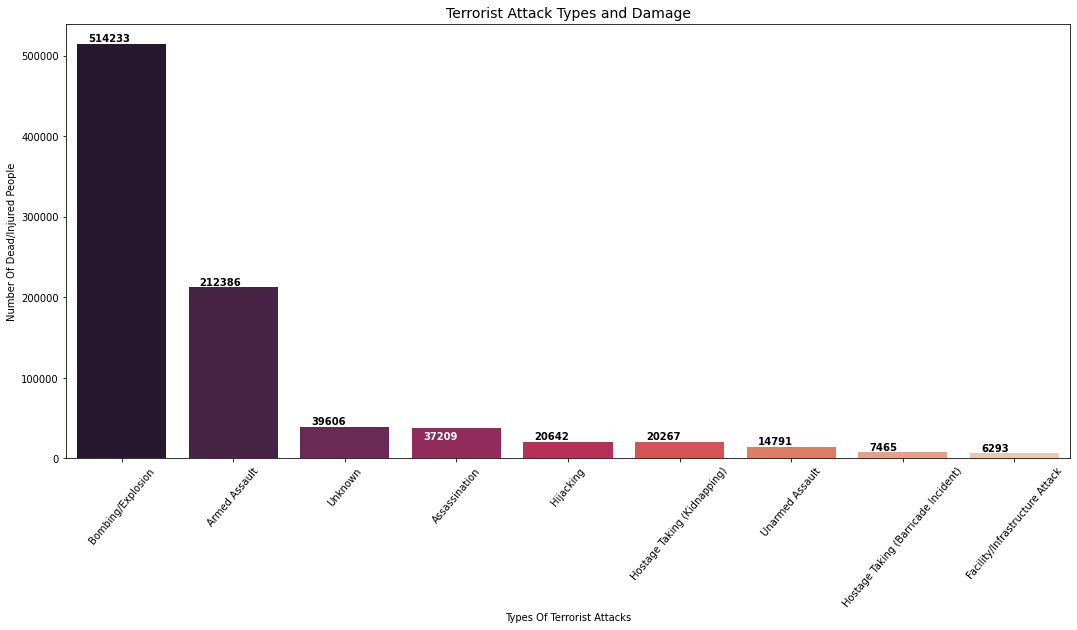

In [ ]:
labels = table_1['attacktype1_txt'].tolist()
dmg = table_1['Damage'].tolist()




plt.figure(figsize=(18, 8))

ax = sns.barplot(x=labels, y=dmg , palette="rocket")



for i,v in enumerate(dmg):
    ax.text(i-0.3, v-13000 if v==37209 else v+3000, str(round(v)), 
             color='w' if v==37209 else 'k',
             fontweight='bold')
ax.set(xlabel='Types Of Terrorist Attacks', ylabel='Number Of Dead/Injured People')

ax.set_xticklabels(ax.get_xticklabels(),rotation=50)
plt.title('Terrorist Attack Types and Damage', fontsize=14)


plt.show()

In [ ]:
df.plot(kind = 'scatter', x = 'nkill', y = 'nwound', alpha = 0.5, color = 'green', figsize = (10,10), fontsize=15)
plt.xlabel('Kill', fontsize=15)
plt.ylabel('Wound', fontsize=15)
plt.title('Kill - Wound Using Scatter Plot')
plt.show()

# **India**

In [ ]:
ind = df.loc[df['country_txt']=='India', 'iyear']

In [ ]:
plt.figure(figsize=(23,8))
sns.countplot(x=ind, data=df)
plt.xlabel('years')
plt.ylabel('Number of attacks in India')
plt.title('Attacks in india over the years')

In [ ]:
# most active group in india in recent year's
indg = df.loc[df['country_txt']=='India', ['gname', 'iyear', 'provstate']]

In [ ]:
indg.groupby('gname')['gname'].count().nlargest(10)

In [ ]:
# terrorist group in india
df.loc[df['country_txt']=='India', ['gname']].reset_index()

# **which region in india most affacted by the terrorist**

In [ ]:
indg.groupby('provstate')['provstate'].count().nlargest(10)

In [ ]:

# Histogram of the Data
data_relevant.hist(figsize=(15,10));

In [ ]:
Data = df.loc[:,'nkill']
print('Number of people killed by terror attack:', int(sum(Data.dropna())))

In [ ]:
attackData = df.loc[:,'attacktype1':'attacktype1_txt']
typeKillData = pd.concat([attackData, killData], axis=1)
print(attackData)
print(typeKillData)


In [ ]:
typeKillFormatData = typeKillData.pivot_table(columns='attacktype1_txt', values='nkill', aggfunc='sum')
print(typeKillFormatData

In [ ]:
labels = typeKillFormatData.columns.tolist() # convert line to list
transpoze = typeKillFormatData.T # transpoze
values = transpoze.values.tolist()
fig, ax = plt.subplots(figsize=(15, 15), subplot_kw=dict(aspect="equal"))
plt.pie(values, startangle=90, autopct='%.2f%%',shadow = True,
        colors = sns.color_palette())
plt.title('Types of terrorist attacks that cause deaths')
plt.legend(labels, loc='upper right', bbox_to_anchor = (1.6, 0.9), fontsize=15) # location legend
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(data_relevant.corr(), vmin=-1, cmap='coolwarm', annot=True);

##Finding dependencies among the various parameters in the dataset can reveal a key pattern about the nature of terrorism, we have selected the most significant 7 for this map. Some of those parameters are the YEAR, MONTH, DAY, REGION, KILL, SUCCESS RATE and PROPERTY. Forming a correlation map can provide us with one-to-one correspondence of each variable with rest.

# **world map for terrorist activity**

In [ ]:
import plotly.express as px
dfnew = df[(~df['latitude'].isna()) & (~df['longitude'].isna())]

In [ ]:
dfnew = dfnew[(~dfnew['nkill'].isna())]

In [ ]:
dfnew = dfnew[(~dfnew['provstate'].isna())]

In [ ]:
dfname = dfnew.rename(columns={'attacktype1_txt': 'attack_type', 'gname':'group'}, inplace=True)

In [ ]:
geo = px.scatter_mapbox(dfnew, lat='latitude', lon='longitude', hover_name='provstate', size='nkill', color='attack_type', hover_data=['success', 'group'],
                        color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=1,
                        mapbox_style='carto-positron')
geo.show()

**Overall Conclusion:** We can see by analysis not even a single part of world is untouched by the terrosit attacks. This has become a serious concern for humanity. Other than this the Asian country are mostly affected.

**Safety Measures:** 

1.   All the world leaders should come together and make a strong law agains terrorism,as it is the obstacle in way of human development.
 
2.   Security measures must be updated time to time.

1.   Any one found giving hatred speech must be punished as per the law.
2.   Border security defence system should be efficient enough in order to pevent any attacks.

1.   Most importantly we as citizen must be vigilant enough to suspect any type of suspicious activities.

At last we want to conclude by saying that terrorists are not a enemny of any particular country or region, it is the enenmy for whole of humanity.